In [1]:
import pandas as pd
import os
import numpy as np
import sys
sys.path.append("../")
sys.path.append("../..")


In [12]:
start_time = "2020-11-25 00:00:00"
end_time ="2022-12-08 00:00:00"
intDataInfo= { "db_info":[ 
    {"db_name":"farm_outdoor_weather", "measurement":"seoul", "start":start_time, "end":end_time},
    {"db_name":"finance_korean_stock", "measurement":"stock","tag_key":"company", "tag_value":"AJ네트웍스", "start":start_time, "end":end_time}
]}  

In [13]:
integrationFreq_min= 30
integration_freq_sec = 60 * integrationFreq_min# 분

## 1. Simple Integration

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
{'granularity_sec': 1800, 'param': {}, 'method': 'simple'}
self.refine_param ::  {'removeDuplication': {'flag': False}, 'staticFrequency': {'flag': False, 'frequency': None}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End


<AxesSubplot:xlabel='datetime'>

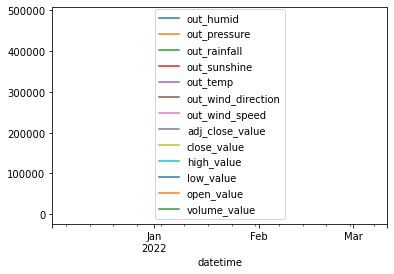

In [14]:
##### Preprocessing Parameter ######################################################################################
# 1. No Cleaning
refine_param = {"removeDuplication":{"flag":False},"staticFrequency":{"flag":False, "frequency":None}}
CertainParam= {'flag': False}
uncertainParam= {'flag': False, "param":{}}
outlier_param ={
    "certainErrorToNaN":CertainParam, 
    "unCertainErrorToNaN":uncertainParam
}
imputation_param = {"serialImputation":{"flag":False}}

NoCleanprocess_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}
integration_param = {
    "granularity_sec":integration_freq_sec,
    "param":{},
    "method":"simple"
}
##################################################################################################################
process_param = NoCleanprocess_param # or CleanProcessParam
from KETIPreDataIngestion.KETI_setting import influx_setting_KETI as ins
from KETIPreDataIngestion.data_influx import influx_Client
db_client = influx_Client.influxClient(ins.CLUSTDataServer)

from KETIPreDataIntegration.clustDataIntegration import ClustIntegration
Result = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, process_param,integration_param)
Result.plot()

## 2. AutomaticCleanIntegration

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
{'granularity_sec': 1800, 'param': {}, 'method': 'simple'}
self.refine_param ::  {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': datetime.timedelta(seconds=1800)}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End


<AxesSubplot:xlabel='datetime'>

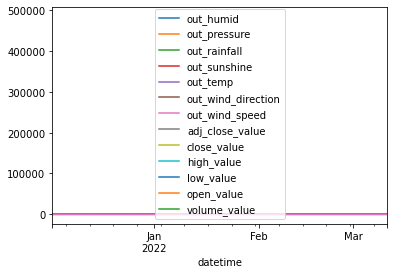

In [15]:
from datetime import date, timedelta
frequencyMinTimeDelta= timedelta(seconds=integration_freq_sec) #frequencyMinTimeDelta can be None

refine_param = {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': frequencyMinTimeDelta}}
CertainParam= {'flag': True}
uncertainParam= {'flag': False, "param":{}}
outlier_param ={
    "certainErrorToNaN":CertainParam, 
    "unCertainErrorToNaN":uncertainParam
}
imputation_param =imputation_param = {
"serialImputation":{
    "flag":True,
    "imputation_method":[{"min":0,"max":3,"method":"linear", "parameter":{}}], 
    "totalNonNanRatio":40}
}

defaultCleanProcess_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}
Result = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, defaultCleanProcess_param,integration_param)
Result.plot()

In [16]:
Result

,out_humid,out_pressure,out_rainfall,out_sunshine,out_temp,out_wind_direction,out_wind_speed,adj_close_value,close_value,high_value,low_value,open_value,volume_value
datetime,,,,,,,,,,,,,
2021-12-02 00:00:00+00:00,61.0,1014.20,0.0,0.0,-1.70,230.0,2.10,5290.0,5290.0,5360.0,5190.0,5360.0,171551.0
2021-12-02 00:30:00+00:00,61.5,1014.15,0.0,0.0,-1.75,240.0,1.85,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 01:00:00+00:00,62.0,1014.10,0.0,0.0,-1.80,250.0,1.60,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 01:30:00+00:00,61.5,1013.80,0.0,0.0,-1.90,250.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 02:00:00+00:00,61.0,1013.50,0.0,0.0,-2.00,250.0,2.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-10 22:00:00+00:00,57.0,1009.10,0.0,0.0,2.30,270.0,1.30,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10 22:30:00+00:00,58.0,1009.05,0.0,0.0,2.05,280.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10 23:00:00+00:00,59.0,1009.00,0.0,0.0,1.80,290.0,1.80,NaN,NaN,NaN,NaN,NaN,NaN
